In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Import dataset

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NNDL HW1/wine.data.csv')

data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 3-1 Adaline

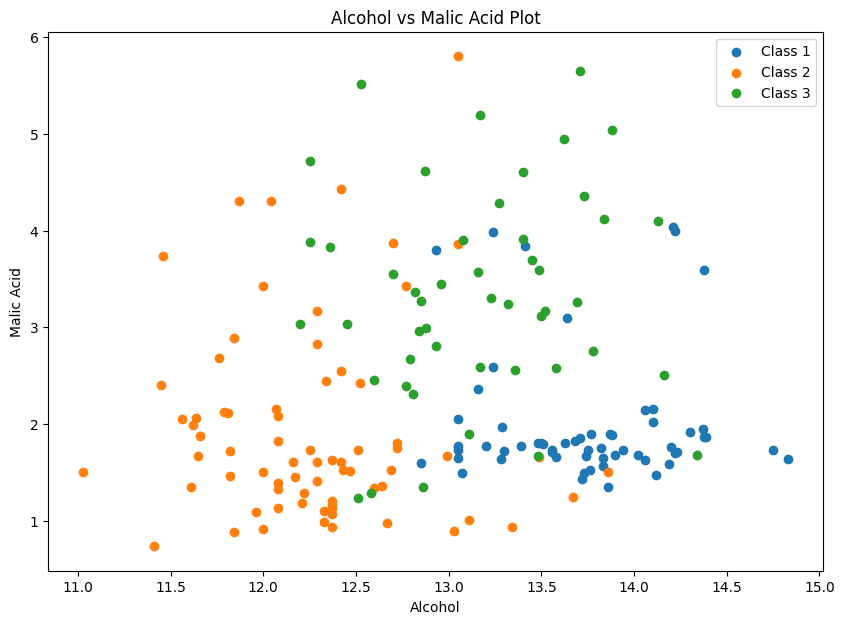

In [ ]:
plt.figure(figsize=(10, 7))
for class_number in data['Class'].unique():
    subset = data[data['Class'] == class_number]
    plt.scatter(subset['Alcohol'], subset['Malic acid'], label=f'Class {class_number}')

plt.title('Alcohol vs Malic Acid Plot')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

In [ ]:
# Adaline Class
class Adaline(object):
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

##Train Adaline

In [ ]:
X_train = data[['Alcohol', 'Malic acid']].values
y = data['Class'].values
y_train = np.where(y == 1, 1, -1)

# Train
adaline_model = Adaline(epochs=100, learning_rate=0.01)
adaline_model.fit(X_train, y_train)

#Weights of the Adaline Model
pd.DataFrame(data = adaline_model.weights)

<ipython-input-4-6506ce798025>:17: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,0
0,5.393636e+246
1,7.038859e+247
2,1.272506e+247


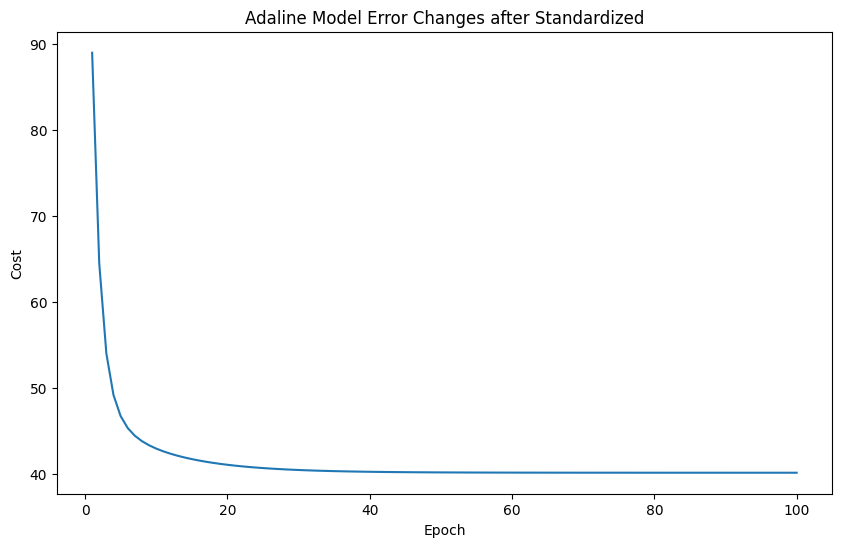

,0
0,-0.337079
1,0.632378
2,-0.254494


In [ ]:
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Standardize
X_train_std = standardize(X_train)

adaline_model = Adaline(epochs=100, learning_rate=0.01)
adaline_model.fit(X_train_std, y_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adaline_model.cost_) + 1), adaline_model.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Adaline Model Error Changes after Standardized')
plt.show()
pd.DataFrame(data = adaline_model.weights)

<ipython-input-7-fa01126ee394>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


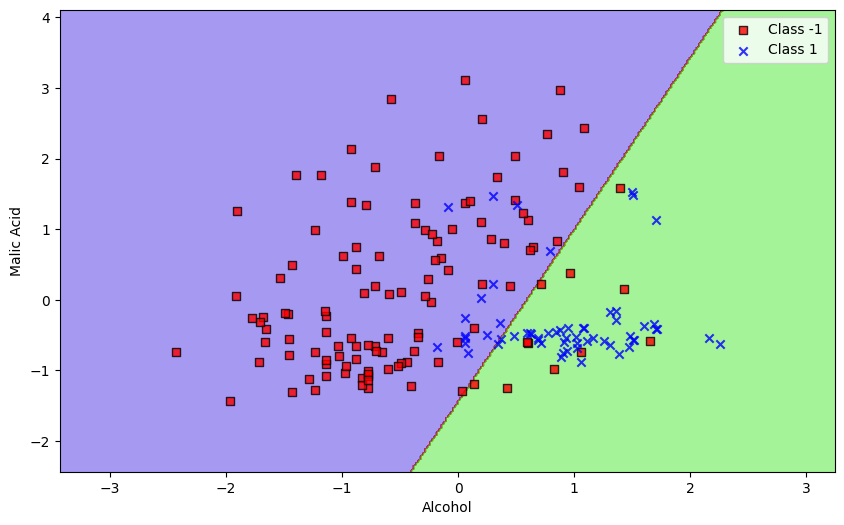

In [ ]:
#Decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.brg
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(standardize(np.array([xx1.ravel(), xx2.ravel()]).T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_std, y_train, classifier=adaline_model)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

#Part 3-1

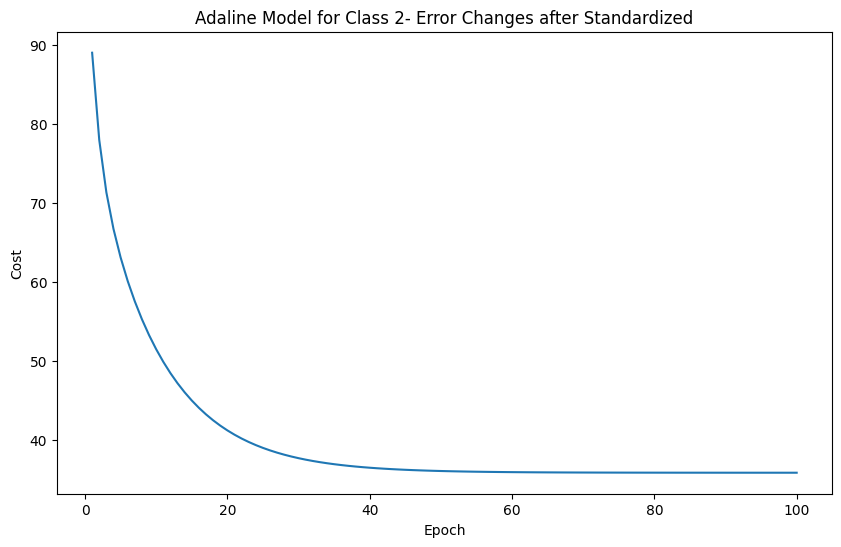

,0
0,-0.202247
1,-0.688037
2,-0.221721


In [ ]:
X_train2 = data[['Alcohol', 'Malic acid']].values
y = data['Class'].values
y_train2 = np.where(y == 2, 1, -1)

X_train_std2 = standardize(X_train)

adaline_model2 = Adaline(epochs=100, learning_rate=0.01)
adaline_model2.fit(X_train_std2, y_train2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adaline_model2.cost_) + 1), adaline_model2.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Adaline Model for Class 2- Error Changes after Standardized')
plt.show()
pd.DataFrame(data = adaline_model2.weights)

In [ ]:
print("Final Cost of Part a: ",adaline_model.cost_[99])
print("Final Cost of Part b: ",adaline_model2.cost_[99])

Final Cost of Part a:  40.16904379710083
Final Cost of Part b:  35.89945115912139


<ipython-input-10-eab412a670f0>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


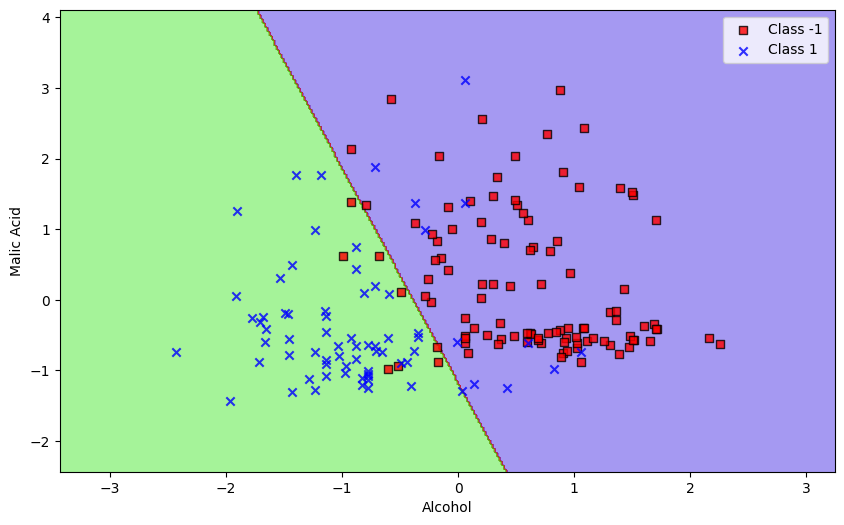

In [ ]:
#Decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.brg
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(standardize(np.array([xx1.ravel(), xx2.ravel()]).T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_std2, y_train2, classifier=adaline_model2)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

## 3-2 Madaline

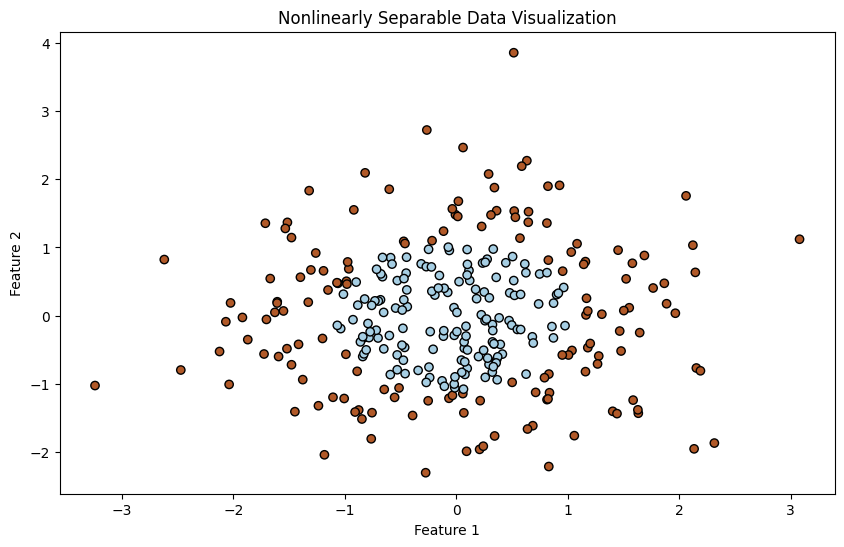

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

np.random.seed(42)

X, y = make_gaussian_quantiles(n_samples=300, n_features=2, n_classes=2, random_state=42)

y[y == 0] = -1

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Nonlinearly Separable Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
import copy
class MadalineModel:
    def __init__(self, layer_size, max_iter=100, lr=0.1):
        self.max_iter = max_iter
        self.lr = lr

        np.random.seed(40)
        self.w = np.random.rand(layer_size, 2)
        self.v = np.ones(layer_size)
        self.b1 = np.random.rand(layer_size, 1)
        self.b2 = layer_size - 1

    def train(self, X, Y):
        counter = 0
        self.costs = []
        for iteration in range(self.max_iter):
            w_old = copy.deepcopy(self.w)
            for x, target in zip(X, Y):
                z_in = np.array([np.matmul(x, self.w.T)]).T + self.b1
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != target:
                    if target == 1:
                        z_j = max(z_in)
                        idx = np.where(z_in == z_j)
                        self.w[idx, :] = self.w[idx, :] + self.lr * (1 - z_in[idx]) * np.array(x)
                        self.b1[idx] = self.b1[idx] + self.lr * (1 - z_in[idx])
                    else:
                        idx = [i for i, x in enumerate(z_in) if x > 0]
                        for i in idx:
                            self.w[i, :] = self.w[i, :] + self.lr * (-1 - z_in[i]) * np.array(x)
                            self.b1[i] = self.b1[i] + self.lr * (-1 - z_in[i])

            self.costs.append(self.calculate_error(self.predict(X), Y))

            if np.all((self.w - w_old) < 0.0001) and iteration > 10:
                counter += 1
                if counter > 10:
                    print(f"Total iterations with {len(self.b1)} lines: {iteration + 1}")
                    break

    def predict(self, X):
        predictions = []
        for x in X:
            z_in = np.array([np.matmul(x, self.w.T)]).T + self.b1
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            predictions.append(np.heaviside(y_in, 1) * 2 - 1)
        return predictions

    def calculate_error(self, output, target):
        self.error = ((target - output) ** 2).sum() / 2.
        return self.error


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


neuron_counts = [3, 5, 8]
models = []

for neurons in neuron_counts:
    model = MadalineModel(layer_size=neurons)
    model.train(X_train, y_train)
    models.append(model)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {neurons} neurons: {accuracy * 100:.2f}%")


Accuracy for 3 neurons: 78.33%
Accuracy for 5 neurons: 95.00%
Accuracy for 8 neurons: 96.67%


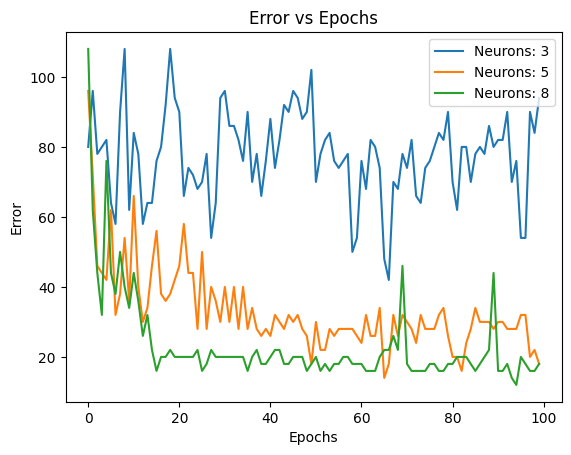

In [ ]:
for i, model in enumerate(models):
    plt.plot(model.costs, label=f"Neurons: {neuron_counts[i]}")
plt.title("Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

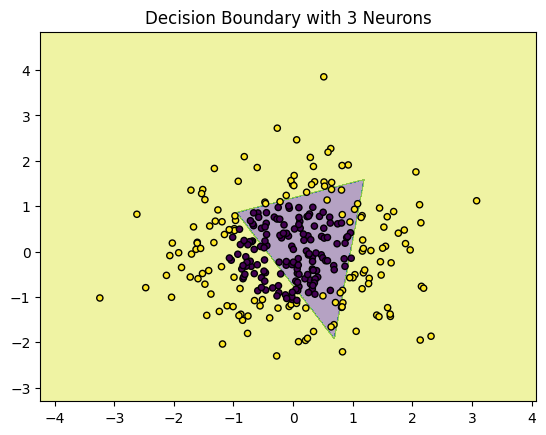

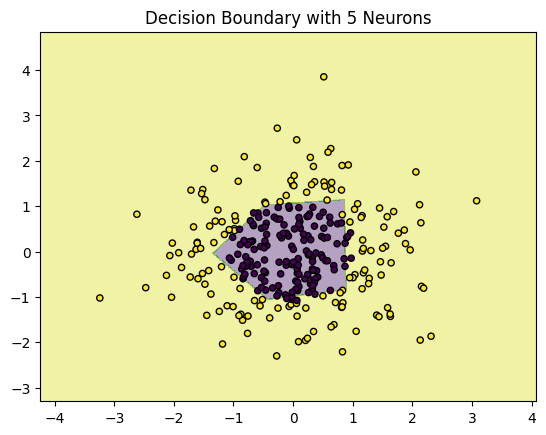

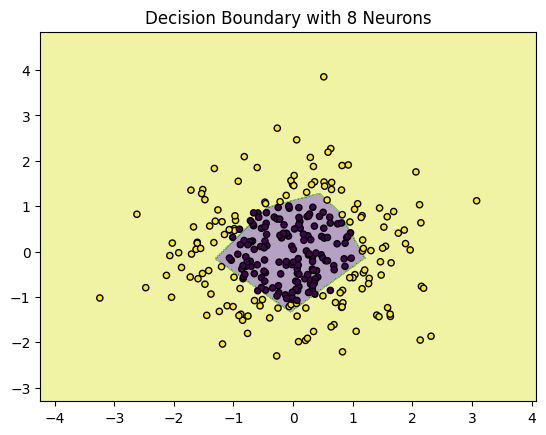

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()

for i, model in enumerate(models):
    plot_decision_boundary(model, X, y, title=f"Decision Boundary with {neuron_counts[i]} Neurons")
